<a href="https://colab.research.google.com/github/ShirishaReddyV/AI-Sandbox/blob/main/DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Path: /kaggle/input/android-malware-detection


/tmp/ipython-input-1-3444466917.py:26: DtypeWarning: Columns (56,58,63) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


Dataset shape after limiting to top 20,000 rows: (20000, 86)

Top numerical columns with outliers:
 Destination Port          1405
 Packet Length Variance    1145
Fwd PSH Flags              1120
 SYN Flag Count            1120
 Flow Duration             1069
dtype: int64

Top features used for DBSCAN: [' Destination Port', ' Packet Length Variance', 'Fwd PSH Flags']

DBSCAN detected 1 outliers (Cluster = -1)


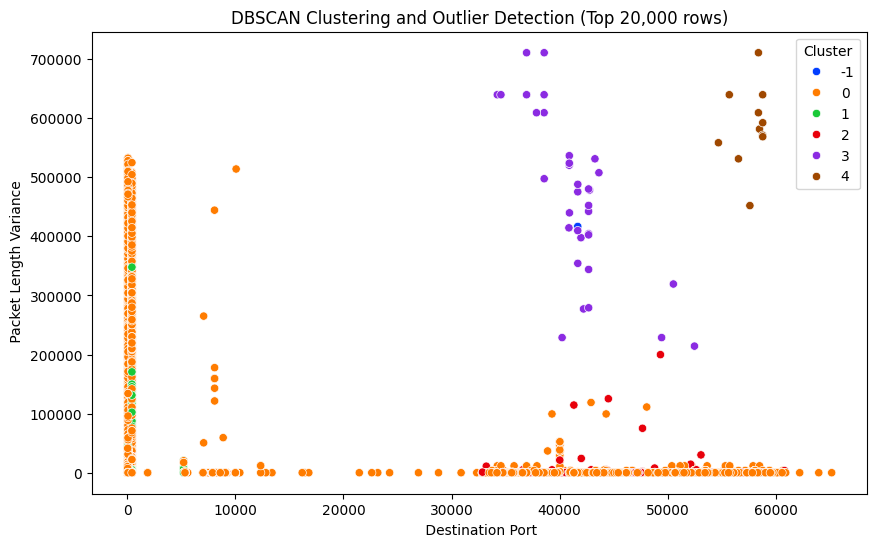

In [ ]:
# Required Libraries
import kagglehub
import pandas as pd
import numpy as np
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Step 1: Download dataset
path = kagglehub.dataset_download("subhajournal/android-malware-detection")
print("Dataset Path:", path)

# Step 2: Load CSV
csv_file = None
for file in os.listdir(path):
    if file.endswith(".csv"):
        csv_file = os.path.join(path, file)
        break

if csv_file is None:
    raise FileNotFoundError("No CSV file found in downloaded dataset!")

df = pd.read_csv(csv_file)

# Step 3: Take only top 20,000 rows
df = df.head(20000)
print("Dataset shape after limiting to top 20,000 rows:", df.shape)

# Step 4: Z-Score Based Outlier Summary
numeric_cols = df.select_dtypes(include=np.number).columns
df_numeric = df[numeric_cols]

z_scores = df_numeric.apply(zscore)
outliers = (z_scores > 2.5) | (z_scores < -2.5)
outlier_summary = outliers.sum().sort_values(ascending=False)

print("\nTop numerical columns with outliers:")
print(outlier_summary.head())

# Step 5: DBSCAN on top 3 numerical features with most outliers
top_relevant_cols = outlier_summary[outlier_summary > 0].head(3).index.tolist()
print("\nTop features used for DBSCAN:", top_relevant_cols)

# Drop NaNs and scale
X = df[top_relevant_cols].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Add cluster labels
X_dbscan = X.copy()
X_dbscan['Cluster'] = labels

# Count noise points
num_outliers = np.sum(labels == -1)
print(f"\nDBSCAN detected {num_outliers} outliers (Cluster = -1)")

# Step 6: Visualize DBSCAN clusters using first two features
plt.figure(figsize=(10, 6))
palette = sns.color_palette("bright", len(set(labels)))
sns.scatterplot(data=X_dbscan, x=top_relevant_cols[0], y=top_relevant_cols[1], hue="Cluster", palette=palette)
plt.title("DBSCAN Clustering and Outlier Detection (Top 20,000 rows)")
plt.show()


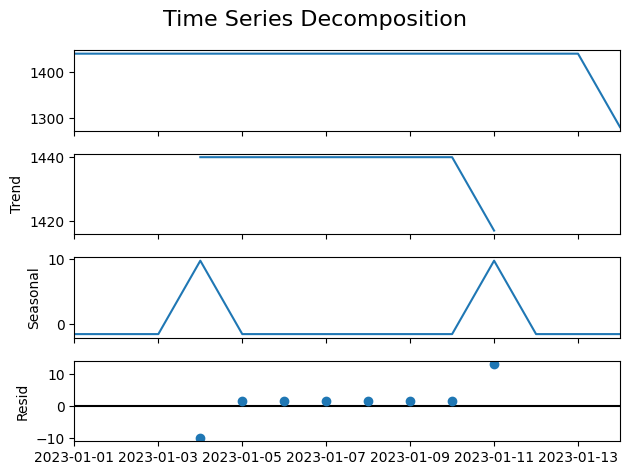

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(ts, model='additive')
result.plot()
plt.suptitle("Time Series Decomposition", fontsize=16)
plt.tight_layout()
plt.show()


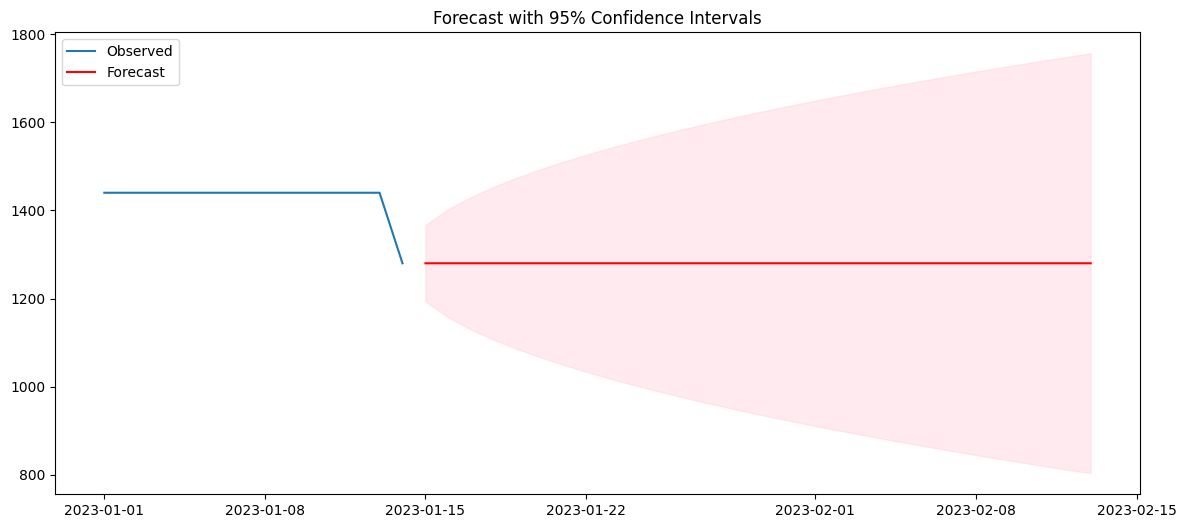

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(ts, order=(5, 1, 0))
model_fit = model.fit()

forecast_result = model_fit.get_forecast(steps=30)
forecast = forecast_result.predicted_mean
conf_int = forecast_result.conf_int()

# Plot forecast with confidence intervals
plt.figure(figsize=(14, 6))
plt.plot(ts, label='Observed')
plt.plot(forecast, label='Forecast', color='red')
plt.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title("Forecast with 95% Confidence Intervals")
plt.legend()
plt.show()


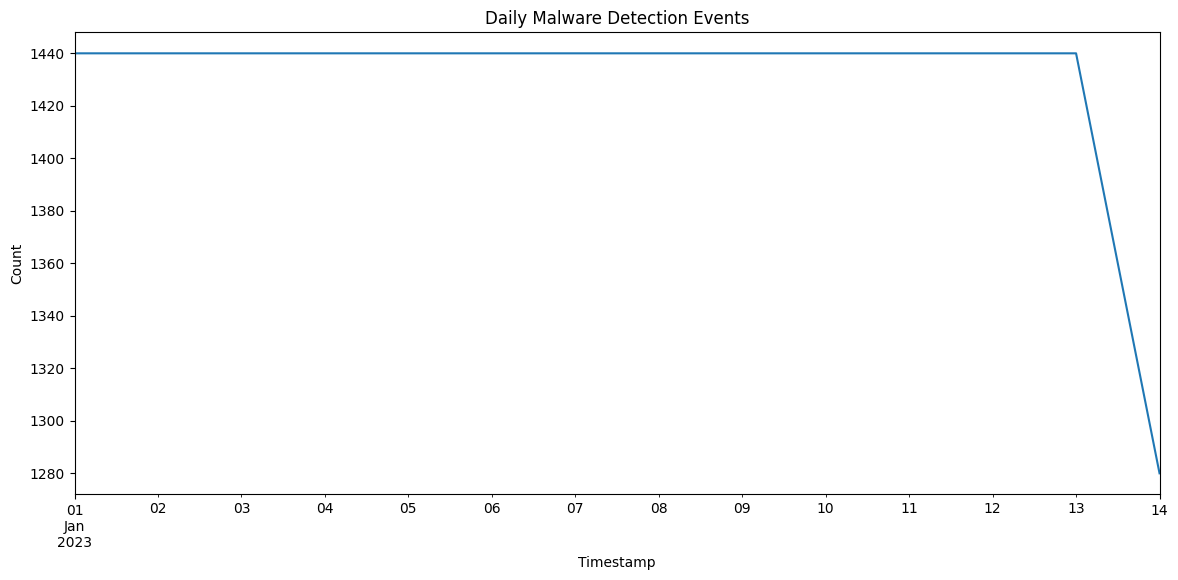

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Parse datetime column
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
df = df.dropna(subset=['Timestamp'])

# Step 2: Set time index
df.set_index('Timestamp', inplace=True)

# Step 3: Resample time series (e.g., hourly or daily)
ts = df.resample('D').size()  # 'H' for hourly, 'D' for daily
ts = ts.asfreq('D').fillna(0)

# Step 4: Plot time series
plt.figure(figsize=(14, 6))
ts.plot()
plt.title("Daily Malware Detection Events")
plt.ylabel("Count")
plt.show()


In [ ]:
import os
import pandas as pd

# Locate the CSV file from the downloaded folder
csv_file = None
for file in os.listdir(path):
    if file.endswith(".csv"):
        csv_file = os.path.join(path, file)
        break

# Load the file
df = pd.read_csv(csv_file)

# Show all column names
print("Column names in dataset:\n", df.columns.tolist())


/tmp/ipython-input-9-1908381465.py:12: DtypeWarning: Columns (56,58,63) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


Column names in dataset:
 ['Unnamed: 0', 'Flow ID', ' Source IP', ' Source Port', ' Destination IP', ' Destination Port', ' Protocol', ' Timestamp', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Pac

In [ ]:
# Remove all leading/trailing spaces from column names
df.columns = df.columns.str.strip()


In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')


/tmp/ipython-input-11-1911596212.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')


In [ ]:
# Step 1: Clean column names
df.columns = df.columns.str.strip()

# Step 2: Convert 'Timestamp' to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
df = df.dropna(subset=['Timestamp'])  # Drop rows with invalid/missing timestamps

# Step 3: Extract time features
df['Hour'] = df['Timestamp'].dt.hour
df['DayOfWeek'] = df['Timestamp'].dt.dayofweek
df['DayName'] = df['Timestamp'].dt.day_name()


/tmp/ipython-input-12-979797806.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hour'] = df['Timestamp'].dt.hour
/tmp/ipython-input-12-979797806.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DayOfWeek'] = df['Timestamp'].dt.dayofweek
/tmp/ipython-input-12-979797806.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

/tmp/ipython-input-13-34853291.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Hour', palette='magma')


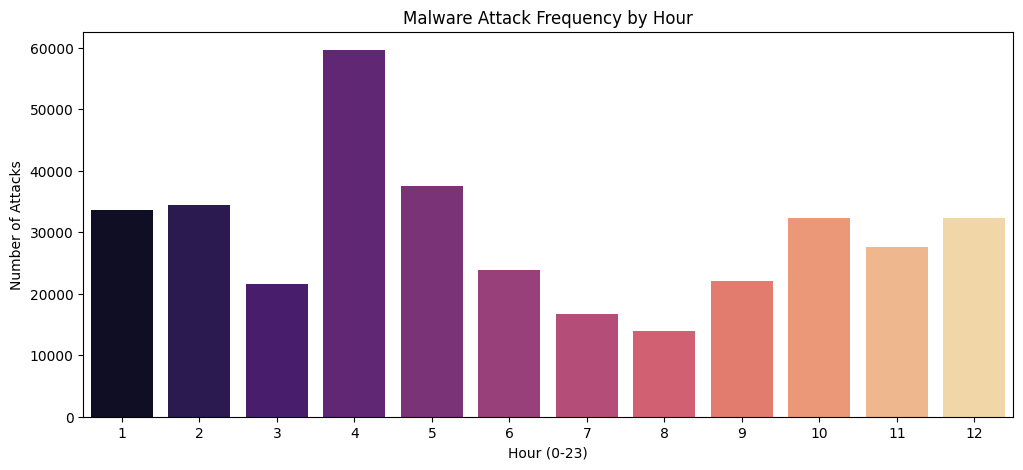

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='Hour', palette='magma')
plt.title('Malware Attack Frequency by Hour')
plt.xlabel('Hour (0-23)')
plt.ylabel('Number of Attacks')
plt.show()


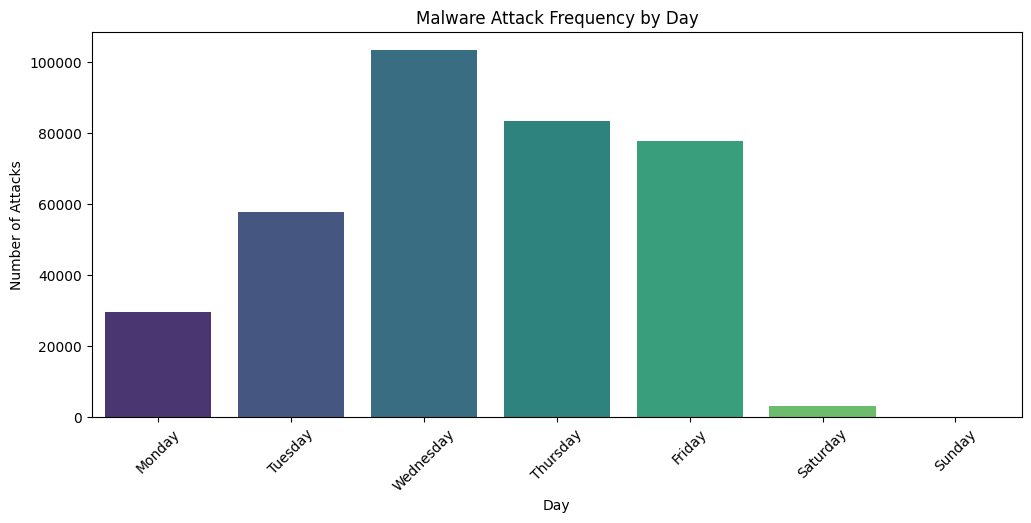

In [ ]:
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='DayName', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='viridis')
plt.title('Malware Attack Frequency by Day')
plt.xlabel('Day')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.show()


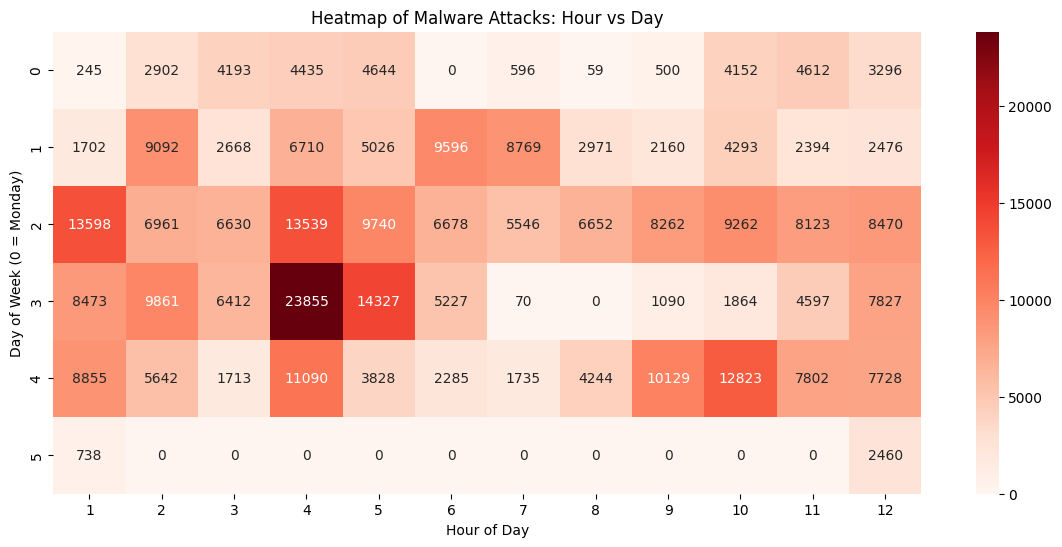

In [ ]:
heatmap_data = df.groupby(['DayOfWeek', 'Hour']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, cmap='Reds', annot=True, fmt='d')
plt.title('Heatmap of Malware Attacks: Hour vs Day')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week (0 = Monday)')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from docx import Document
from docx.shared import Inches

# Step 1: Load and clean data
df = pd.read_csv("PATH_TO_YOUR_DOWNLOADED_CSV.csv", low_memory=False)  # <-- Replace with your local path
df.columns = df.columns.str.strip()
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
df.dropna(subset=['Timestamp'], inplace=True)
df['Hour'] = df['Timestamp'].dt.hour
df['DayOfWeek'] = df['Timestamp'].dt.dayofweek
df['DayName'] = df['Timestamp'].dt.day_name()

# Step 2: Z-Score Outlier Detection
numeric_cols = df.select_dtypes(include=np.number).columns
z_scores = StandardScaler().fit_transform(df[numeric_cols])
z_df = pd.DataFrame(z_scores, columns=numeric_cols)
outliers = (z_df > 2.5) | (z_df < -2.5)
outlier_counts = outliers.sum().sort_values(ascending=False)
top_features = outlier_counts.head(3).index.tolist()

# Step 3: DBSCAN
scaled_top = StandardScaler().fit_transform(df[top_features])
df['DBSCAN_Label'] = DBSCAN(eps=0.5, min_samples=5).fit_predict(scaled_top)

# Step 4: Plots
sns.scatterplot(data=df, x=top_features[0], y=top_features[1], hue='DBSCAN_Label')
plt.title("DBSCAN Clustering")
plt.savefig("dbscan.png")
plt.close()

sns.countplot(data=df, x='Hour', palette='magma')
plt.title("Attacks by Hour")
plt.savefig("hourly.png")
plt.close()

heatmap_data = df.groupby(['DayOfWeek', 'Hour']).size().unstack(fill_value=0)
sns.heatmap(heatmap_data, cmap="Reds", annot=True, fmt="d")
plt.title("Heatmap: Hour vs Day")
plt.savefig("heatmap.png")
plt.close()

# Step 5: Word Report
doc = Document()
doc.add_heading("Android Malware Detection Analysis Report", 0)
doc.add_paragraph("This report includes Z-score-based outlier detection, DBSCAN clustering, and time-series analysis of attack patterns.")

doc.add_heading("1. Outlier Detection", level=1)
doc.add_paragraph(f"Top features with the most outliers: {', '.join(top_features)}")

doc.add_heading("2. DBSCAN Clustering", level=1)
doc.add_paragraph("Below is the clustering plot of the top 2 features based on DBSCAN.")
doc.add_picture("dbscan.png", width=Inches(6))

doc.add_heading("3. Attack Time Distribution", level=1)
doc.add_paragraph("Attack distribution over hours of the day:")
doc.add_picture("hourly.png", width=Inches(6))

doc.add_paragraph("Heatmap of attack frequency by day and hour:")
doc.add_picture("heatmap.png", width=Inches(6))

doc.add_heading("Conclusion", level=1)
doc.add_paragraph("This combined analysis can help in profiling malware behavior, scheduling scans, and designing effective defensive systems.")

doc.save("Android_Malware_Report.docx")


ModuleNotFoundError: No module named 'docx'

In [ ]:
%pip install python-docx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 7.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from docx import Document
from docx.shared import Inches

# Step 1: Load and clean data - This step is removed as df is already available

# Step 2: Z-Score Outlier Detection
numeric_cols = df.select_dtypes(include=np.number).columns
z_scores = StandardScaler().fit_transform(df[numeric_cols])
z_df = pd.DataFrame(z_scores, columns=numeric_cols)
outliers = (z_df > 2.5) | (z_df < -2.5)
outlier_counts = outliers.sum().sort_values(ascending=False)
top_features = outlier_counts.head(3).index.tolist()

# Step 3: DBSCAN
# Ensure that the columns in top_features exist in the DataFrame and handle potential NaNs
scaled_top = StandardScaler().fit_transform(df[top_features].dropna())
df['DBSCAN_Label'] = DBSCAN(eps=0.5, min_samples=5).fit_predict(scaled_top)

# Step 4: Plots
# Ensure that the columns in top_features exist in the DataFrame
sns.scatterplot(data=df, x=top_features[0], y=top_features[1], hue='DBSCAN_Label')
plt.title("DBSCAN Clustering")
plt.savefig("dbscan.png")
plt.close()

sns.countplot(data=df, x='Hour', palette='magma')
plt.title("Attacks by Hour")
plt.savefig("hourly.png")
plt.close()

heatmap_data = df.groupby(['DayOfWeek', 'Hour']).size().unstack(fill_value=0)
sns.heatmap(heatmap_data, cmap="Reds", annot=True, fmt="d")
plt.title("Heatmap: Hour vs Day")
plt.savefig("heatmap.png")
plt.close()

# Step 5: Word Report
doc = Document()
doc.add_heading("Android Malware Detection Analysis Report", 0)
doc.add_paragraph("This report includes Z-score-based outlier detection, DBSCAN clustering, and time-series analysis of attack patterns.")

doc.add_heading("1. Outlier Detection", level=1)
doc.add_paragraph(f"Top features with the most outliers: {', '.join(top_features)}")

doc.add_heading("2. DBSCAN Clustering", level=1)
doc.add_paragraph("Below is the clustering plot of the top 2 features based on DBSCAN.")
doc.add_picture("dbscan.png", width=Inches(6))

doc.add_heading("3. Attack Time Distribution", level=1)
doc.add_paragraph("Attack distribution over hours of the day:")
doc.add_picture("hourly.png", width=Inches(6))

doc.add_paragraph("Heatmap of attack frequency by day and hour:")
doc.add_picture("heatmap.png", width=Inches(6))

doc.add_heading("Conclusion", level=1)
doc.add_paragraph("This combined analysis can help in profiling malware behavior, scheduling scans, and designing effective defensive systems.")

doc.save("Android_Malware_Report.docx")

NameError: name 'df' is not defined